<a href="https://colab.research.google.com/github/ezgigit/aygazverianalizi/blob/main/verianaliziproje_ezgigumeci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

In [33]:
sns.set(rc={'figure.figsize':(8,6)})

In [34]:
data = pd.read_csv("/content/AB_NYC_2019.csv")
data.head

<bound method NDFrame.head of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

         

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [36]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [37]:
data["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [38]:
data["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [39]:
data["room_type"].head()

0       Private room
1    Entire home/apt
2       Private room
3    Entire home/apt
4    Entire home/apt
Name: room_type, dtype: object

Text(0.5, 1.0, 'Neighbourhood Group')

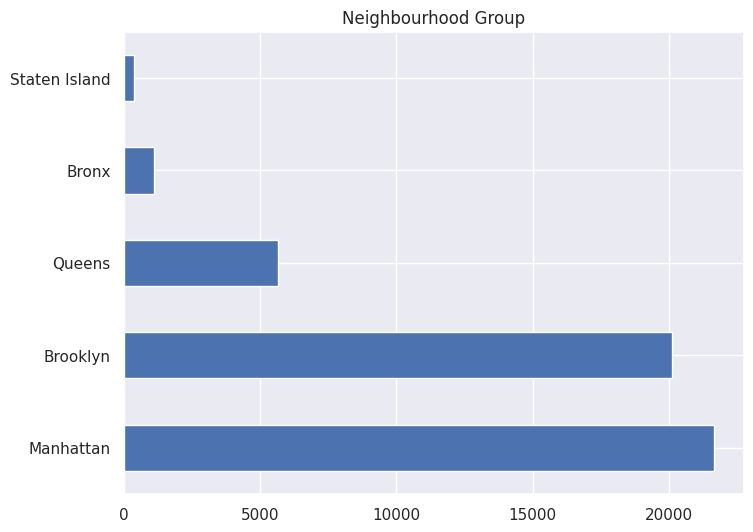

In [43]:
data["neighbourhood_group"].value_counts().plot.barh().set_title("Neighbourhood Group")

Text(0.5, 1.0, 'Room Types')

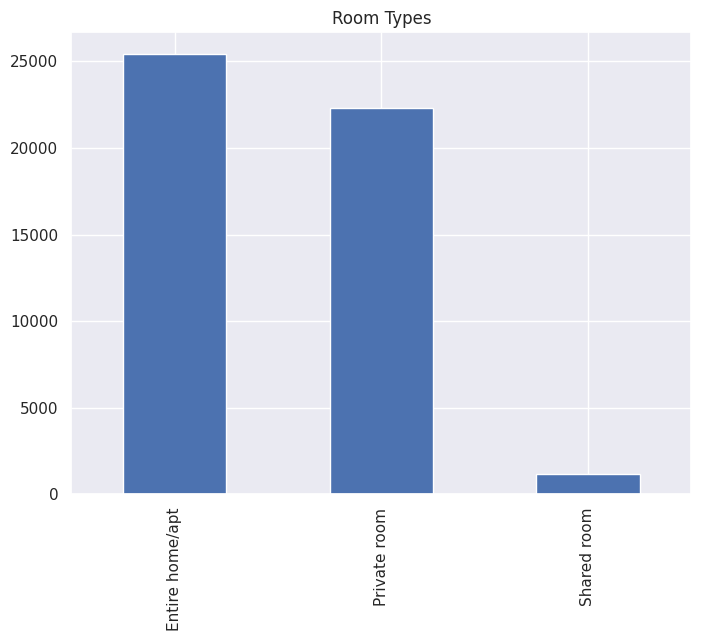

In [41]:
data["room_type"].value_counts().plot.bar().set_title("Room Types")

Text(0.5, 1.0, 'Room Type')

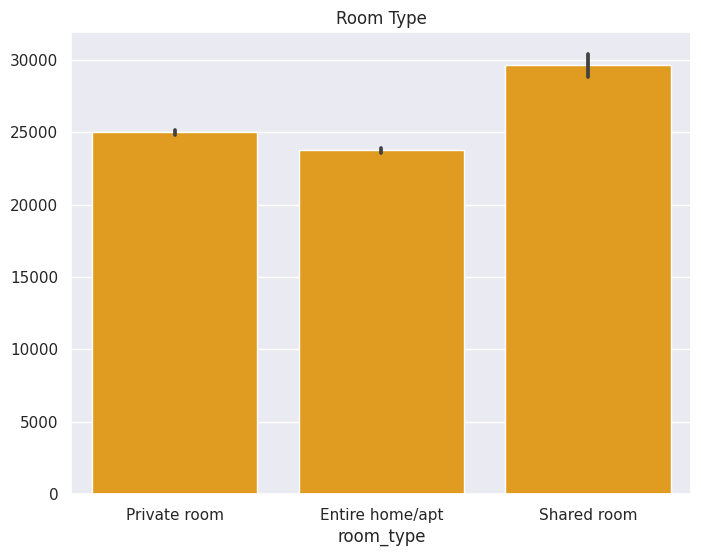

In [45]:
sns.barplot(x="room_type" , y=data["room_type"].index , data = data, color = "orange").set_title("Room Type")

Text(0.5, 1.0, 'Room Type - Price - Neighbourhood Group')

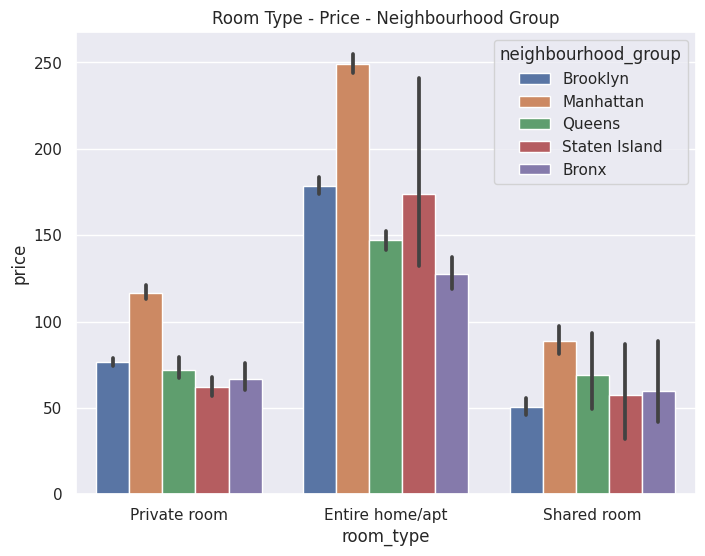

In [46]:
sns.barplot(x="room_type" , y="price" , hue = "neighbourhood_group" , data = data)
plt.title("Room Type - Price - Neighbourhood Group")

<ipython-input-50-60d9495a6bd1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

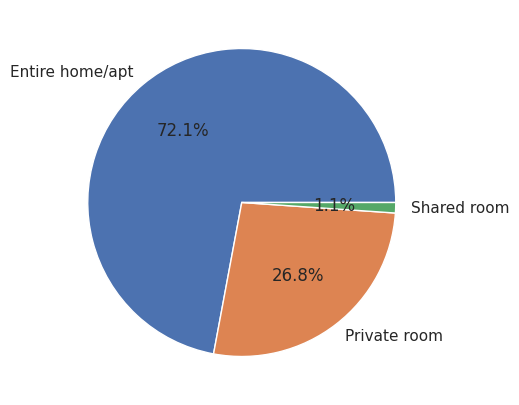

In [50]:
data.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

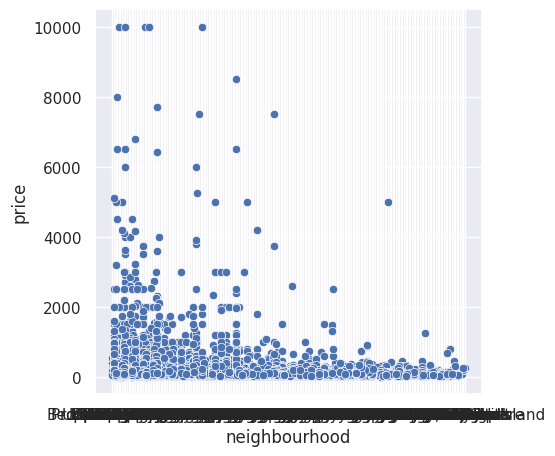

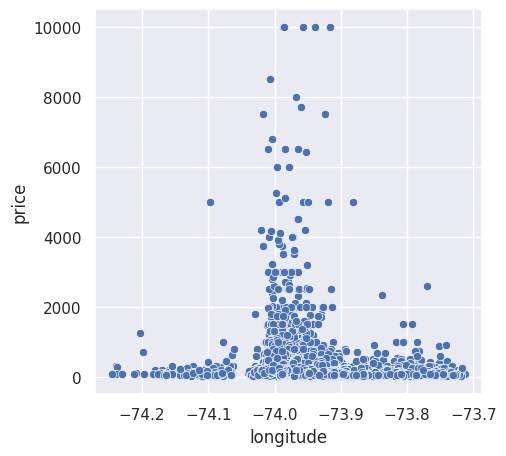

In [54]:
cols = ["neighbourhood", "longitude"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="price", data=data)

<Axes: xlabel='price', ylabel='Count'>

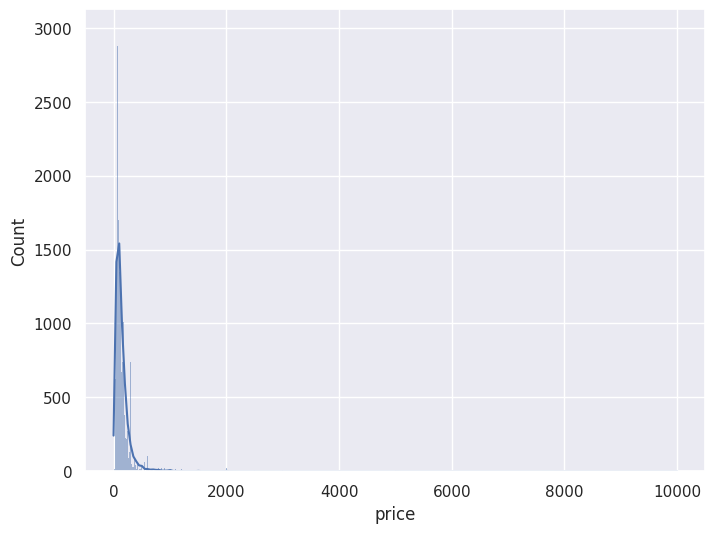

In [55]:
sns.histplot(data["price"], kde=True)

<Axes: xlabel='price', ylabel='Count'>

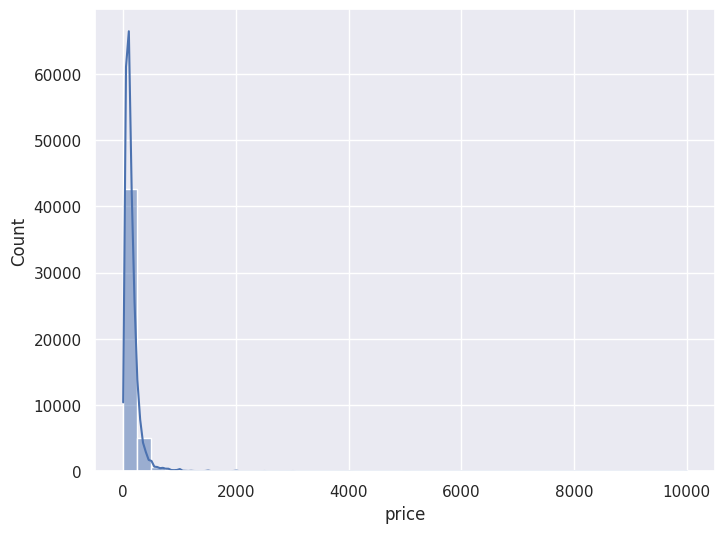

In [56]:
sns.histplot(data["price"], kde=True, bins=40)

<Axes: xlabel='price', ylabel='Density'>

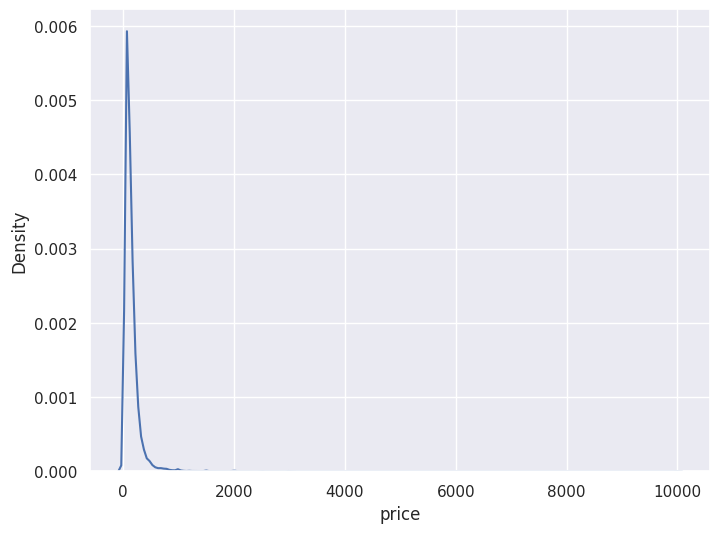

In [58]:
sns.kdeplot(data["price"])

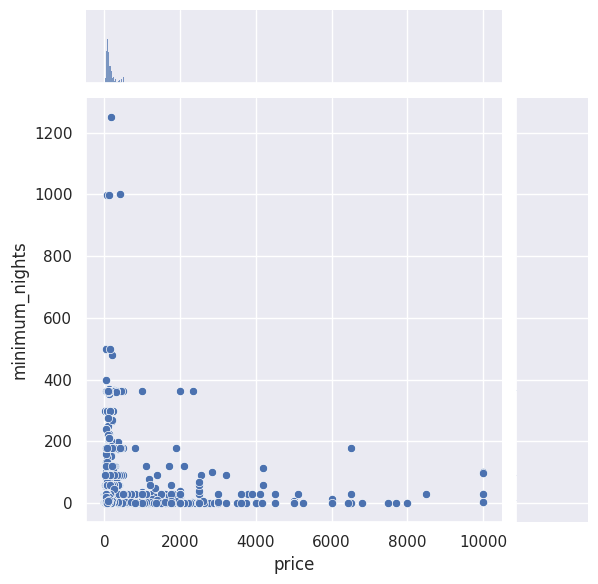

In [60]:
sns.jointplot(x="price", y=data["minimum_nights"], data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


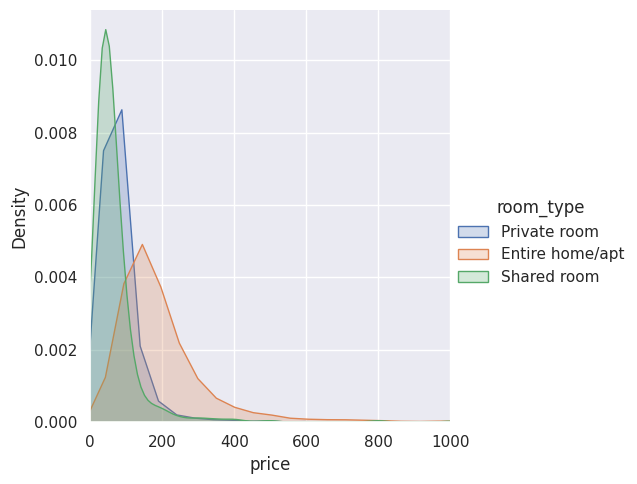

In [62]:
(sns.FacetGrid(data, hue="room_type", height=5, xlim=(0, 1000)).map(sns.kdeplot, "price", shade=True).add_legend())

<ipython-input-63-a7a2dae8c748>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


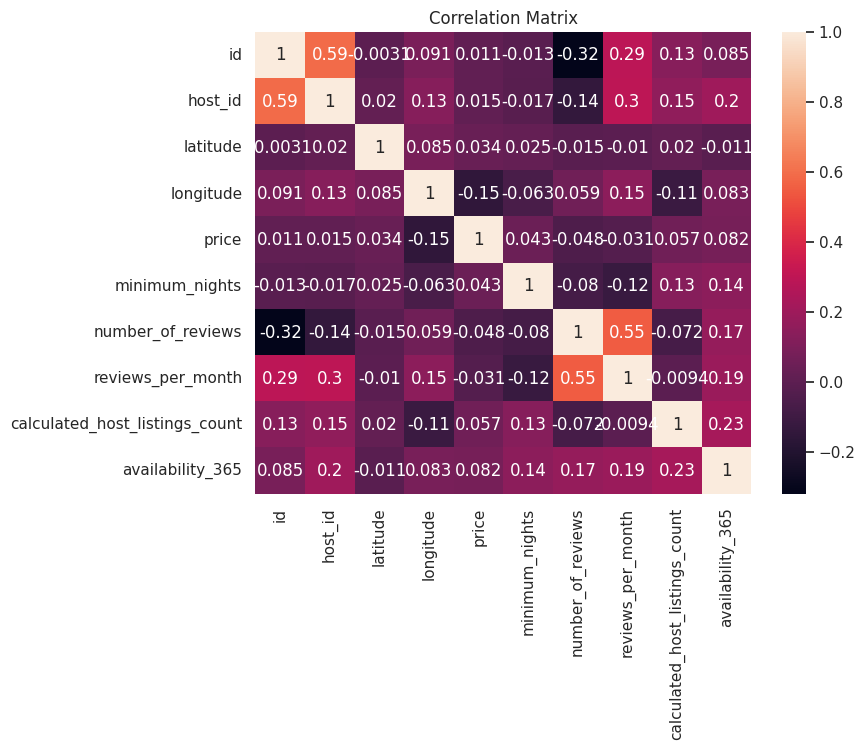

In [63]:
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), annot=True);